# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle= \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma^2
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions, $\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [3]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

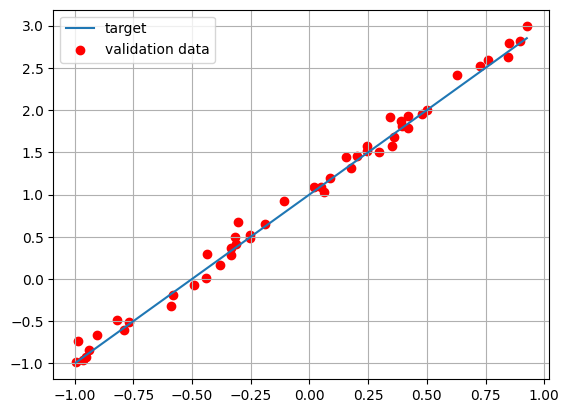

In [4]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [5]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

tf.random.set_seed(0)

random.seed(0)
np.random.seed(0)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2024-06-24 00:46:01.055393: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/TeoRazza/pythonenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# get a summary of our composed model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [7]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.0554 - mse: 2.0554 - val_loss: 1.4368 - val_mse: 1.4368
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4319 - mse: 1.4319 - val_loss: 1.0324 - val_mse: 1.0324
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0365 - mse: 1.0365 - val_loss: 0.7673 - val_mse: 0.7673
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7742 - mse: 0.7742 - val_loss: 0.5853 - val_mse: 0.5853
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5925 - mse: 0.5925 - val_loss: 0.4551 - val_mse: 0.4551
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4617 - mse: 0.4617 - val_loss: 0.3587 - val_mse: 0.3587
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3646 - mse: 0.3646 - val_loss: 0.2855 - val_mse: 0.2855
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2907 - mse: 0.2907 - val_loss: 0.2289 - val_mse: 0.2289
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2335 - mse:

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [8]:
# return weights and biases
model.get_weights()

[array([[1.9343784]], dtype=float32), array([0.98836106], dtype=float32)]

In [9]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mse: 0.0117 

Test loss: 0.012453002855181694
Test accuracy: 0.012453002855181694


In [10]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mse: 0.0012         

Test loss: 0.001429149997420609
Test accuracy: 0.001429149997420609


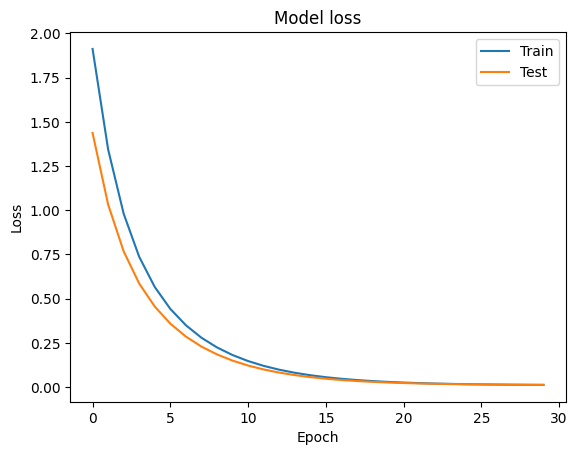

In [11]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


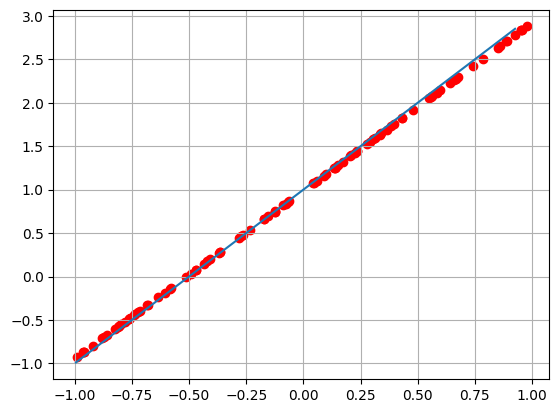

In [12]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

I fixed $\sigma=0.1$. Increasing the number of training data clearly improves the ability of the NN to learn from them. But we need to be conscious, we don't wanto to increase too much the epoch and risk to overfit. I kept $20$ epochs based on the plot of loss for training and validation data.

In [120]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

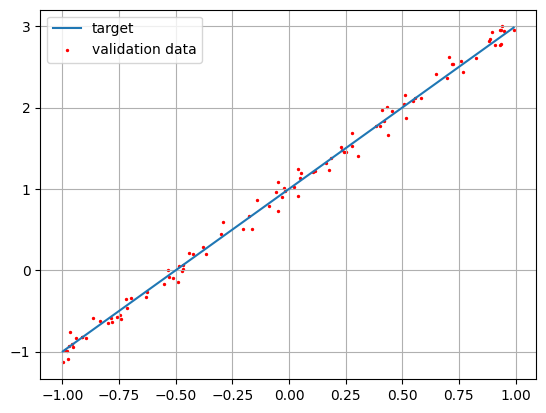

In [121]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data', s=2)
plt.legend()
plt.grid(True)
plt.show()

In [122]:
test = tf.keras.Sequential()
test.add(Dense(1, input_shape=(1,)))

# Adds another layer with 1 unit, each connected to 1 output of previous layer
# test.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
test.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [123]:
# get a summary of our composed model
test.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [124]:
# fit the model using training dataset
# over 15 epochs of 32 batch size each
# report training progress against validation data
history = test.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9767 - mse: 3.9767 - val_loss: 3.0882 - val_mse: 3.0882
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3232 - mse: 2.3232 - val_loss: 1.9338 - val_mse: 1.9338
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4389 - mse: 1.4389 - val_loss: 1.2425 - val_mse: 1.2425
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9169 - mse: 0.9169 - val_loss: 0.8079 - val_mse: 0.8079
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5925 - mse: 0.5925 - val_loss: 0.5289 - val_mse: 0.5289
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3861 - mse: 0.3861 - val_loss: 0.3481 - val_mse: 0.3481
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2534 - mse: 0.2534 - val_loss: 0.2306 - val_mse: 0.2306
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1676 - mse: 0.1676 - val_loss: 0.1540 - val_mse: 0.1540
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1122 - mse: 

In [125]:
# return weights and biases
test.get_weights()

[array([[1.958304]], dtype=float32), array([1.0023737], dtype=float32)]

In [126]:
# evaluate model
score = test.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090 - mse: 0.0090 

Test loss: 0.009593668393790722
Test accuracy: 0.009593668393790722


In [127]:
# evaluate model with the exact curve
score = test.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9285e-04 - mse: 7.9285e-04

Test loss: 0.0006877686246298254
Test accuracy: 0.0006877686246298254


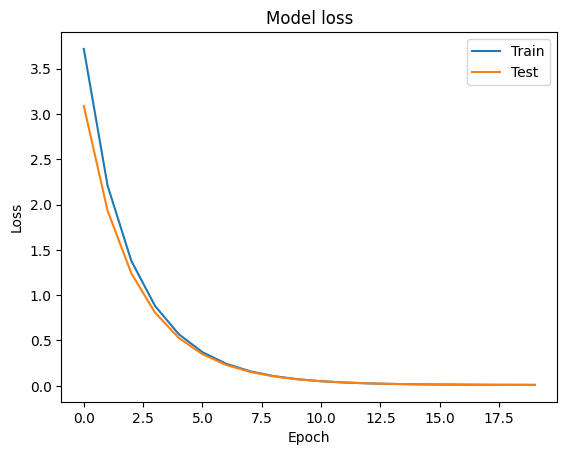

In [128]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


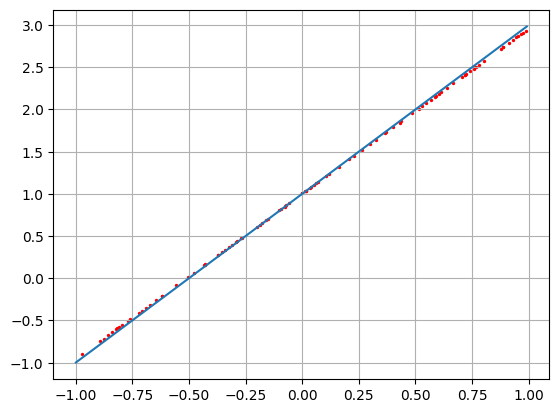

In [129]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = test.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', s=2)
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

I chose:
- $\sigma=0.1$ noise standard deviation.
- $2$ hidden layer, the first one containing $64$ neurons while the second one $32$.
- Training inputs $N=3000$.
- Validation data $n=300$
- $25$ epochs

In [157]:
# generate training inputs
x_train = np.random.uniform(-1, 1, 3000)
x_valid = np.random.uniform(-1, 1, 300)
x_valid.sort()

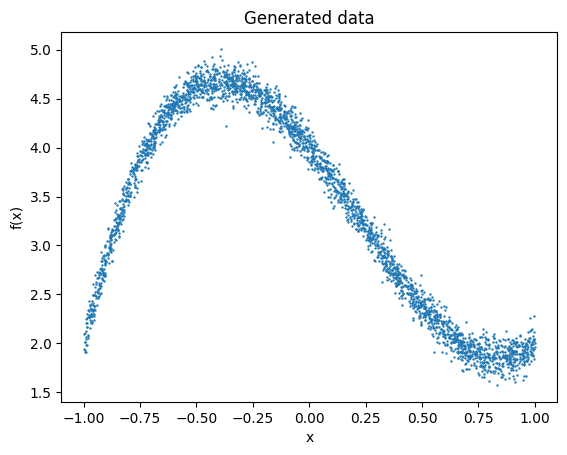

In [158]:
# generate training inputs
z_target = 4-3*x_valid-2*x_valid**2+3*x_valid**3 # ideal (target) function

sigma = 0.1 # noise standard deviation

z_train = np.random.normal(4-3*x_train-2*x_train**2+3*x_train**3, sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(4-3*x_valid-2*x_valid**2+3*x_valid**3, sigma)

# Plot training & validation
plt.scatter(x_train, z_train, s=0.5)
plt.title('Generated data')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

In [159]:
model_2 = tf.keras.Sequential()
model_2.add(Dense(64, input_shape=(1,), activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1))

from tensorflow.keras import optimizers, losses, metrics

# Configure the model for mean-squared error regression
model_2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# model_2.compile(optimizer='sgd', loss=losses.CategoricalCrossentropy(), metrics=['categorical_accuracy'])  # an optional list of metrics

In [160]:
# get a summary of our composed model
model_2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

In [161]:
# fit the model using training dataset
# over 25 epochs of 32 batch size each
# report training progress against validation data
history_2 = model_2.fit(x=x_train, y=z_train, 
          batch_size=32, epochs=25,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, z_valid))

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4562 - mse: 3.4562 - val_loss: 0.4723 - val_mse: 0.4723
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3756 - mse: 0.3756 - val_loss: 0.3299 - val_mse: 0.3299
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2598 - mse: 0.2598 - val_loss: 0.2267 - val_mse: 0.2267
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1784 - mse: 0.1784 - val_loss: 0.1535 - val_mse: 0.1535
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1218 - mse: 0.1218 - val_loss: 0.1072 - val_mse: 0.1072
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0863 - mse: 0.0863 - val_loss: 0.0795 - val_mse: 0.0795
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0651 - mse: 0.0651 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0522 - mse: 0.0522 - val_loss: 0.0518 - val_mse: 0.0518
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0438 - mse: 

In [162]:
# evaluate model with the exact curve
score = model_2.evaluate(x_valid, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - mse: 0.0072 

Test loss: 0.005254410672932863
Test accuracy: 0.005254410672932863


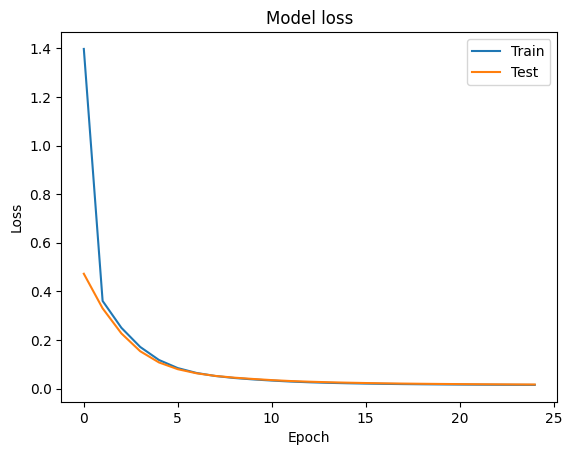

In [163]:
# look into training history
# Plot training & validation loss values
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


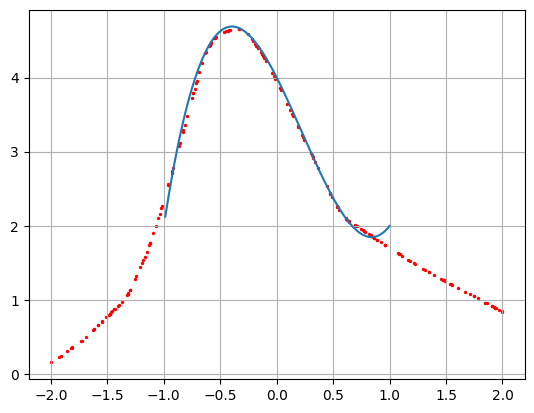

In [164]:
x_predicted = np.random.uniform(-2, 2, 200)
y_predicted = model_2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', s=2)
plt.plot(x_valid, z_target)
plt.grid(True)
plt.show()

Here I increased again the number of training data.

Of course my NN is very well trained to predict values in the interval [-1,1] but it fails to understand what lies outside this interval. This is a very typical behaviour since all the power of a Neural Network stands in the massive data it can study on.

I chose to put two hidden layers even if the Universal Approximation Theorem proves that it is sufficient to build one hidden layer with arbitrary large number of neurons to approximate any lebesgue integrable function. I just wanted to experiment a little bit and I thought that maybe a little bit more expressiveness would catch the right curve tail. However one should always be very carefull not to build a too complicated model that could overfit on the data training. I don't think it is the case.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

In [175]:
# generate training inputs

train_x = np.random.uniform(-1.5, 1.5, 10000)
valid_x = np.random.uniform(-1.5, 1.5, 1000)

train_y = np.random.uniform(-1.5, 1.5, 10000)
valid_y = np.random.uniform(-1.5, 1.5, 1000)

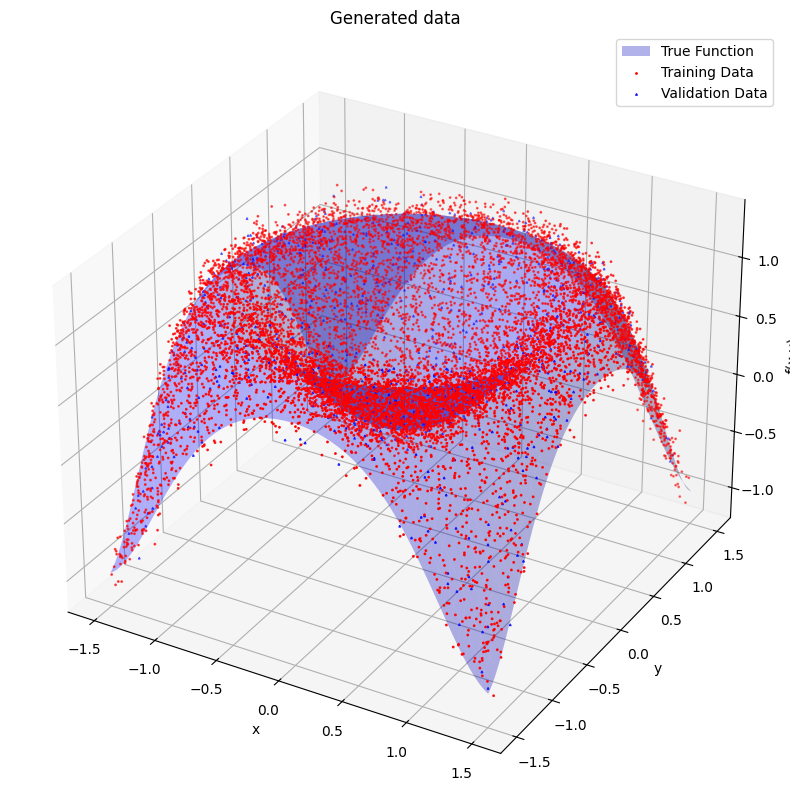

In [176]:
# generate training inputs
# target_z = np.sin(train_x**2+train_y**2) # ideal (target) function

x = np.linspace(-1.5, 1.5, 1000)
y = np.linspace(-1.5, 1.5, 1000)
x, y = np.meshgrid(x, y)
target_z = np.sin(x**2 + y**2)

sigma = 0.1 # noise standard deviation

train_z = np.random.normal(np.sin(train_x**2+train_y**2), sigma) # actual measures from which we want to guess regression parameters
valid_z = np.random.normal(np.sin(valid_x**2+valid_y**2), sigma)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the true function as a surface
ax.plot_surface(x, y, target_z, color='b', alpha=0.3, label='True Function')

ax.scatter(train_x, train_y, train_z, c='r', marker='o', s=1, label='Training Data')
ax.scatter(valid_x, valid_y, valid_z, c='b', marker='^', s=1, label='Validation Data')
ax.set_title('Generated data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()
plt.show()

In [177]:
solver = tf.keras.Sequential()
solver.add(Dense(64, input_dim=2, activation='relu'))
solver.add(Dense(64, activation='relu'))
solver.add(Dense(1))

from tensorflow.keras import optimizers, losses, metrics

# Configure the model for mean-squared error regression
solver.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [178]:
# get a summary of our composed model
solver.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

In [182]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data

train_input = np.vstack((train_x, train_y)).T
valid_input = np.vstack((valid_x, valid_y)).T

historia = solver.fit(x=train_input, y=train_z,
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(valid_input, valid_z))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0516 - val_mse: 0.0516
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0518 - mse: 0.0518 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0450 - mse: 0.0450 - val_loss: 0.0393 - val_mse: 0.0393
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [183]:
# evaluate model
score = solver.evaluate(valid_input, valid_z, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 - mse: 0.0123

Test loss: 0.012300094589591026
Test accuracy: 0.012300094589591026


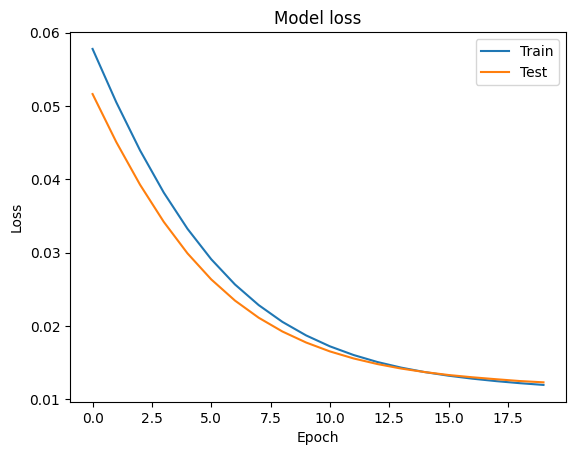

In [186]:
# look into training history
# Plot training & validation loss values
plt.plot(historia.history['loss'])
plt.plot(historia.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


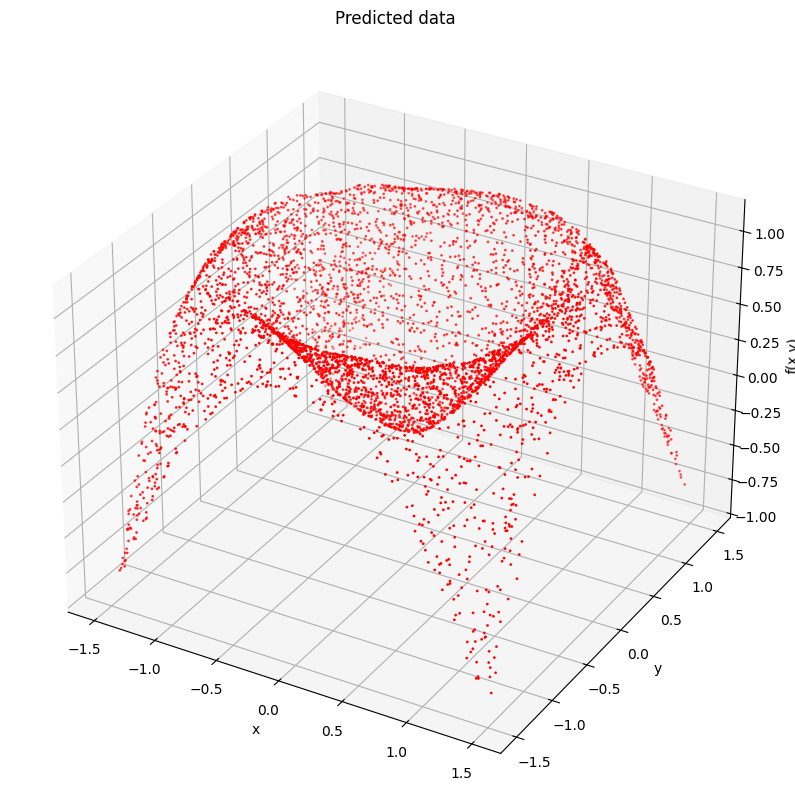

In [187]:

tf.random.set_seed(0)

random.seed(0)
np.random.seed(0)

x_predicted = np.random.uniform(-1.5, 1.5, 5000)
y_predicted = np.random.uniform(-1.5, 1.5, 5000)

input = np.vstack((x_predicted, y_predicted)).T

z_predicted = solver.predict(input)
z_predicted = z_predicted.reshape(x_predicted.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_predicted, y_predicted, z_predicted, c='r', marker='o', s=1, label='Predicted Data')
ax.set_title('Predicted data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
# ax.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


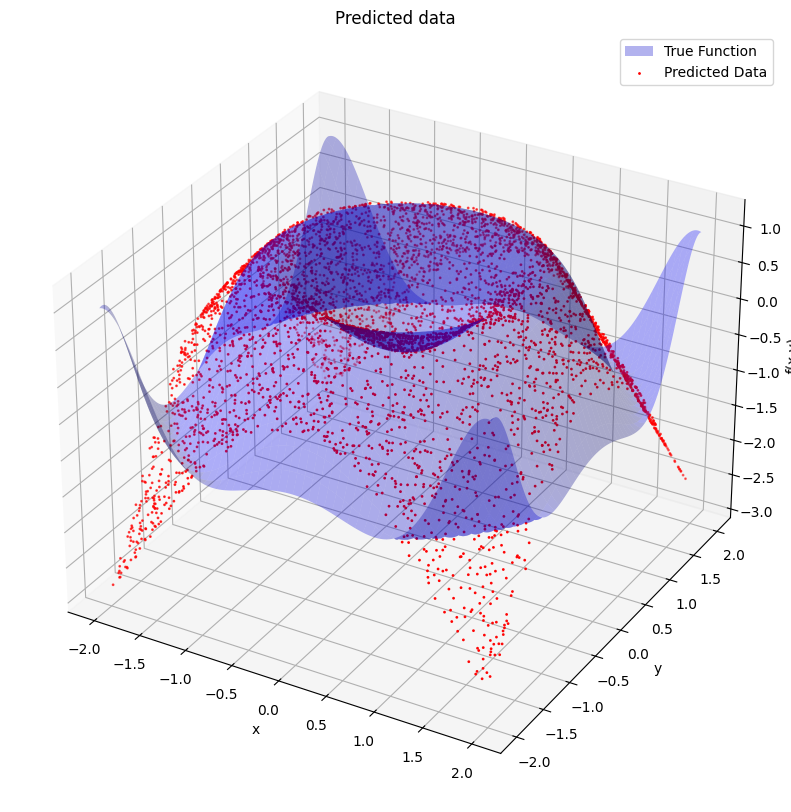

In [188]:
# Genera dati predetti
x_predicted = np.random.uniform(-2, 2, 5000)
y_predicted = np.random.uniform(-2, 2, 5000)

# Genera dati per griglia
x = np.linspace(-2, 2, 5000)
y = np.linspace(-2, 2, 5000)
x, y = np.meshgrid(x, y)

# Calcola la funzione target z
target_z = np.sin(x**2 + y**2)

# Prepara i dati per il modello di predizione
input = np.vstack((x_predicted, y_predicted)).T

# Esegui la predizione
z_predicted = solver.predict(input)
z_predicted = z_predicted.reshape(x_predicted.shape)

# Inizializza il grafico 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotta la funzione target come superficie
ax.plot_surface(x, y, target_z, color='b', alpha=0.3, label='True Function')

# Plotta i dati predetti come punti
ax.scatter(x_predicted, y_predicted, z_predicted, c='r', marker='o', s=1, label='Predicted Data')

# Imposta titolo e etichette
ax.set_title('Predicted data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()

# Mostra il grafico
plt.show()


Here I used a good set of data ($1000$ points per direction) and $20$ epochs seems resonable. Of course also here the NN fails to predict out of its range values.